<a href="https://colab.research.google.com/github/NowshinTasnim/Spatio_Temporal_Crime_Prediction/blob/main/Chicago(_data_analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!wget https://github.com/trishume/OpenTuringCompiler/blob/master/stdlib-sfml/fonts/Times%20New%20Roman.ttf -P /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf

--2022-03-19 17:31:13--  https://github.com/trishume/OpenTuringCompiler/blob/master/stdlib-sfml/fonts/Times%20New%20Roman.ttf
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘/usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/Times New Roman.ttf’

Times New Roman.ttf     [ <=>                ] 122.62K  --.-KB/s    in 0.01s   

2022-03-19 17:31:13 (11.9 MB/s) - ‘/usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/Times New Roman.ttf’ saved [125563]



In [ ]:
# For data processing
import numpy as np
from math import sqrt
# For data processing and manipulation
import pandas as pd
import csv
 
# For date calculations
import datetime
import time
 
# For ploting data
import IPython
import IPython.display
 
import itertools
from itertools import cycle
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
 
# For checking path
import os , gc
from os import path
import csv
import json
 
 
from scipy.stats import hmean
 
from sklearn.metrics import mean_squared_error
 
#tensorflow libs
from tensorflow.keras.layers import *
from tensorflow.keras.layers import Dense , LSTM ,Dropout , PReLU , RepeatVector ,TimeDistributed
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical , plot_model
 
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping , Callback
import tensorflow as tf
from tensorflow.keras import backend as K
 
 
tf.get_logger().setLevel('ERROR')
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

# Reset Keras Session
def reset_keras():
    sess = tf.compat.v1.keras.backend.get_session()
    tf.keras.backend.clear_session()
    sess.close()
    sess = tf.compat.v1.keras.backend.get_session()

    try:
        del classifier # this is from global space - change this as you need
    except:
        pass

    print(gc.collect()) # if it does something you should see a number as output

    # use the same config as you used to create the session
    config = tf.compat.v1.ConfigProto()
    config.gpu_options.per_process_gpu_memory_fraction = 1
    config.gpu_options.visible_device_list = "0"
    tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))

In [ ]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

In [ ]:
#for nuhash
ROOTPATH = '/content/gdrive/MyDrive/Colab Notebooks/ThesisFinal'
PATH_IMAGE = ROOTPATH+'/images_chicago/'
PATH_DA = ROOTPATH+"/datasets/chicago-crime/chicago_data_sf_2004_2017_for_da.csv"
PATH_PDA = ROOTPATH+"/datasets/chicago-crime/chicago_data_sf_2004_2017_for_police_da.csv"

In [ ]:
date_after = pd.to_datetime("1/1/2004  00:00:00 AM")
date_before = pd.to_datetime("1/1/2018  00:00:00 AM")

# Data Visualization


In [ ]:
dataset = pd.read_csv(ROOTPATH+'/datasets/chicago-crime/Crimes_-_2001_to_Present.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
print(dataset.shape)
dataset.head()

(7186664, 22)


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11034701,JA366925,01/01/2001 11:00:00 AM,016XX E 86TH PL,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,8.0,45.0,11,NaN,NaN,2001,08/05/2017 03:50:08 PM,NaN,NaN,NaN
1,11227287,JB147188,10/08/2017 03:00:00 AM,092XX S RACINE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,...,21.0,73.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
2,11227583,JB147595,03/28/2017 02:00:00 PM,026XX W 79TH ST,0620,BURGLARY,UNLAWFUL ENTRY,OTHER,False,False,...,18.0,70.0,05,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
3,11227293,JB147230,09/09/2017 08:17:00 PM,060XX S EBERHART AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,...,20.0,42.0,06,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
4,11227634,JB147599,08/26/2017 10:00:00 AM,001XX W RANDOLPH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,...,42.0,32.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN


Data Visualization Start

In [ ]:
# Read the dataset as Dataframe 
dataset_df = pd.DataFrame(dataset)
dataset_df.drop('ID' , 1, inplace=True)
dataset_df.drop('Case Number' , 1, inplace=True)
dataset_df.drop('Block' , 1, inplace=True)
dataset_df.drop('IUCR' , 1, inplace=True)
dataset_df.drop('Location Description' , 1, inplace=True)
dataset_df.drop('Arrest' , 1, inplace=True)
dataset_df.drop('Domestic' , 1, inplace=True)
dataset_df.drop('Beat' , 1, inplace=True)
dataset_df.drop('Ward' , 1, inplace=True)
dataset_df.drop('Community Area' , 1, inplace=True)
dataset_df.drop('FBI Code' , 1, inplace=True)
dataset_df.drop('Updated On' , 1, inplace=True)
dataset_df.drop('Latitude' , 1, inplace=True)
dataset_df.drop('Longitude' , 1, inplace=True)
dataset_df.drop('Location' , 1, inplace=True)

# Process the Dates column
dataset_df['Date'] = pd.to_datetime(dataset_df['Date']) 

dataset_df = dataset_df[(dataset_df.Date)>=date_after]
dataset_df = dataset_df[(dataset_df.Date)<date_before]

dataset_df = dataset_df.sort_values(by = ['Date'])
dataset_df["Primary Type"].replace({"NON - CRIMINAL": "NON-CRIMINAL" , "NON-CRIMINAL (SUBJECT SPECIFIED)":"NON-CRIMINAL", "OTHER OFFENSE":"OTHER OFFENSES", "THEFT": "LARENCY/THEFT", "MOTOR VEHICLE THEFT": "VEHICLE THEFT", "NARCOTICS": "DRUG/NARCOTIC", "CRIMINAL SEXUAL ASSAULT": "ASSAULT", "CRIM SEXUAL ASSAULT": "ASSAULT"}, inplace=True)

dataset = dataset_df.copy()

# Divide Dates into year, month, day, hour, minute
dataset_df['Year'] = dataset_df['Date'].apply(lambda x: x.year)
dataset_df['Month'] = dataset_df['Date'].apply(lambda x: x.month)
dataset_df['DayofMonth'] = dataset_df['Date'].apply(lambda x: x.day)
dataset_df = dataset_df.rename(columns={"Primary Type": "Category", "District": "PdDistrict" ,
                                        "X Coordinate":"X" , "Y Coordinate":"Y"})

dataset_df['DayOfWeek'] = dataset_df['Date'].dt.day_name()

dataset_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In a futur

,Date,Category,Description,PdDistrict,X,Y,Year,Month,DayofMonth,DayOfWeek
4023,2004-01-01,LARENCY/THEFT,FINANCIAL ID THEFT: OVER $300,1.0,NaN,NaN,2004,1,1,Thursday
2935269,2004-01-01,DECEPTIVE PRACTICE,FORGERY,20.0,1167250.0,1936009.0,2004,1,1,Thursday
37811,2004-01-01,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,9.0,NaN,NaN,2004,1,1,Thursday
11223,2004-01-01,SEX OFFENSE,CRIMINAL TRANSMISSION OF HIV,6.0,NaN,NaN,2004,1,1,Thursday
2901967,2004-01-01,OTHER OFFENSES,TELEPHONE THREAT,3.0,1184845.0,1863907.0,2004,1,1,Thursday


In [ ]:
#dataset_df.to_csv(PATH_DA, index= False)
# dataset_df = pd.read_csv(PATH_DA)

In [ ]:
# Finding number of unique years 
num_year = dataset_df['Year'].nunique()
print("Num Year :" , num_year)
# Finding uniuqe classes
classes = dataset_df['Category'].drop_duplicates().sort_values(ascending = True).values
print("Unique classes = \n",classes)

# Number of classes
num_classes = classes.shape[0]
print("Number of cateories = ",num_classes)

Num Year : 14
Unique classes = 
 ['ARSON' 'ASSAULT' 'BATTERY' 'BURGLARY'
 'CONCEALED CARRY LICENSE VIOLATION' 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS'
 'DECEPTIVE PRACTICE' 'DRUG/NARCOTIC' 'GAMBLING' 'HOMICIDE'
 'HUMAN TRAFFICKING' 'INTERFERENCE WITH PUBLIC OFFICER' 'INTIMIDATION'
 'KIDNAPPING' 'LARENCY/THEFT' 'LIQUOR LAW VIOLATION' 'NON-CRIMINAL'
 'OBSCENITY' 'OFFENSE INVOLVING CHILDREN' 'OTHER NARCOTIC VIOLATION'
 'OTHER OFFENSES' 'PROSTITUTION' 'PUBLIC INDECENCY'
 'PUBLIC PEACE VIOLATION' 'RITUALISM' 'ROBBERY' 'SEX OFFENSE' 'STALKING'
 'VEHICLE THEFT' 'WEAPONS VIOLATION']
Number of cateories =  31


In [ ]:
# Dictionary for (Number,Day) 
Week_day_n_d = {
    0 : "Sunday",
    1 : "Monday",
    2 : "Tuesday",
    3 : "Wednesday",
    4 : "Thursday",
    5 : "Friday",
    6 : "Saturday",
}

# Dictionary for (Day,Number)
Week_day_d_n = {key:value for (value,key) in Week_day_n_d.items()}

# Initialize a list for updating data
DayOfWeek = [0 for i in range(dataset_df.shape[0])]

# Update the dataframe
dataset_df["WDay"] = dataset_df['DayOfWeek'].apply(lambda x: Week_day_d_n[x])
print("Day column -> \n",dataset_df["WDay"])

Day column -> 
 4023       4
2935269    4
37811      4
11223      4
2901967    4
          ..
1131099    0
1131085    0
1131320    0
1133891    0
1131079    0
Name: WDay, Length: 5071866, dtype: int64


In [ ]:
#dataset_df.to_csv(PATH_DA, index= False)
# dataset_df = pd.read_csv(PATH_DA)

In [ ]:
print(dataset_df['PdDistrict'].isnull().sum())
dataset_df = dataset_df.drop( index= dataset_df.loc[dataset_df['PdDistrict'].isnull()].index) 
dataset_df = dataset_df.reset_index(drop= True)
print(dataset_df['PdDistrict'].isnull().sum())

# Finding unique police department district name 
Police_dept_name = dataset_df['PdDistrict'].drop_duplicates()
# Number of police department
num_police_dept = len(Police_dept_name)

print("Number of Police Department = ",num_police_dept)
print("Police Departments Name -> \n",Police_dept_name)

# Dictionary for mapping id to name of the unique police department
Police_dept_id_name = {i:Police_dept_name.values[i] for i in range (num_police_dept)}
print("Police Departments ID:Name Dict-> \n",Police_dept_id_name)

# Dictionary for mapping name of the unique police department to id
Police_dept_name_id = {key:value for (value,key) in Police_dept_id_name.items()}
print("Police Departments Name:ID Dict-> \n",Police_dept_name_id)

# Update the new column of dataframe with the value of the list 
dataset_df["PdDID"] = dataset_df['PdDistrict'].apply(lambda x: Police_dept_name_id[x])
print("PdDID column -> \n", dataset_df["PdDID"])

47
0
Number of Police Department =  24
Police Departments Name -> 
 0         1.0
1        20.0
2         9.0
3         6.0
4         3.0
5         8.0
6        10.0
7        14.0
8         4.0
9        15.0
11       25.0
12       24.0
15        5.0
17       17.0
20        7.0
21       11.0
23       16.0
29       19.0
33        2.0
40       18.0
54       12.0
113      22.0
13211    31.0
55159    21.0
Name: PdDistrict, dtype: float64
Police Departments ID:Name Dict-> 
 {0: 1.0, 1: 20.0, 2: 9.0, 3: 6.0, 4: 3.0, 5: 8.0, 6: 10.0, 7: 14.0, 8: 4.0, 9: 15.0, 10: 25.0, 11: 24.0, 12: 5.0, 13: 17.0, 14: 7.0, 15: 11.0, 16: 16.0, 17: 19.0, 18: 2.0, 19: 18.0, 20: 12.0, 21: 22.0, 22: 31.0, 23: 21.0}
Police Departments Name:ID Dict-> 
 {1.0: 0, 20.0: 1, 9.0: 2, 6.0: 3, 3.0: 4, 8.0: 5, 10.0: 6, 14.0: 7, 4.0: 8, 15.0: 9, 25.0: 10, 24.0: 11, 5.0: 12, 17.0: 13, 7.0: 14, 11.0: 15, 16.0: 16, 19.0: 17, 2.0: 18, 18.0: 19, 12.0: 20, 22.0: 21, 31.0: 22, 21.0: 23}
PdDID column -> 
 0           0
1           1
2

In [ ]:
dataset_df.to_csv(PATH_DA, index= False)
# dataset_df = pd.read_csv(PATH_DA)

Preprocessed Analysis

In [ ]:
# Total data after preprocessing
dataset_df.head()

,Date,Category,Description,PdDistrict,X,Y,Year,Month,DayofMonth,DayOfWeek,WDay,PdDID
0,2004-01-01,LARENCY/THEFT,FINANCIAL ID THEFT: OVER $300,1.0,NaN,NaN,2004,1,1,Thursday,4,0
1,2004-01-01,DECEPTIVE PRACTICE,FORGERY,20.0,1167250.0,1936009.0,2004,1,1,Thursday,4,1
2,2004-01-01,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,9.0,NaN,NaN,2004,1,1,Thursday,4,2
3,2004-01-01,SEX OFFENSE,CRIMINAL TRANSMISSION OF HIV,6.0,NaN,NaN,2004,1,1,Thursday,4,3
4,2004-01-01,OTHER OFFENSES,TELEPHONE THREAT,3.0,1184845.0,1863907.0,2004,1,1,Thursday,4,4


In [ ]:
# Police department information (id, name, longitude, latitude)
Police_departments = dataset_df[['PdDID','PdDistrict','X','Y']]
Police_departments = Police_departments.drop_duplicates()
Police_departments.head()

,PdDID,PdDistrict,X,Y
0,0,1.0,NaN,NaN
1,1,20.0,1167250.0,1936009.0
2,2,9.0,NaN,NaN
3,3,6.0,NaN,NaN
4,4,3.0,1184845.0,1863907.0


In [ ]:
# Save the Police department information (id, name, longitude, latitude) to csv file
Police_departments.to_csv(PATH_PDA, index = False)

data_pd_groupby = dataset_df.groupby(["PdDistrict"]).size().reset_index()
data_pd_groupby.columns = ['PdDistrict','Count']
data_pd_groupby

,PdDistrict,Count
0,1.0,198647
1,2.0,222946
2,3.0,261296
3,4.0,293522
4,5.0,227875
5,6.0,298434
6,7.0,303855
7,8.0,350117
8,9.0,251525
9,10.0,219618


In [ ]:
# Category group by
data_crime_groupby = dataset_df.groupby("Category").size().reset_index()
data_crime_groupby.columns = ['Category','Count']
data_crime_groupby.describe()

,Count
count,3.100000e+01
mean,1.636071e+05
std,2.725942e+05
min,1.100000e+01
25%,2.685000e+03
50%,1.783200e+04
75%,2.185550e+05
max,1.065742e+06


In [ ]:
# Crime categories with how many times they occured
Crime_category_descending = data_crime_groupby.sort_values("Count", ascending = False)
Crime_category_descending

,Category,Count
15,LARENCY/THEFT,1065742
2,BATTERY,912632
5,CRIMINAL DAMAGE,580374
8,DRUG/NARCOTIC,543263
1,ASSAULT,329058
21,OTHER OFFENSES,310436
3,BURGLARY,301049
29,VEHICLE THEFT,230190
7,DECEPTIVE PRACTICE,206920
26,ROBBERY,192960


In [ ]:
# Top 10 crime categories
Crime_category_descending.head(10)

,Category,Count
15,LARENCY/THEFT,1065742
2,BATTERY,912632
5,CRIMINAL DAMAGE,580374
8,DRUG/NARCOTIC,543263
1,ASSAULT,329058
21,OTHER OFFENSES,310436
3,BURGLARY,301049
29,VEHICLE THEFT,230190
7,DECEPTIVE PRACTICE,206920
26,ROBBERY,192960


In [ ]:
sn = dataset_df["Category"].value_counts().reset_index()
sn.columns = ['Category','Count']
sn

,Category,Count
0,LARENCY/THEFT,1065742
1,BATTERY,912632
2,CRIMINAL DAMAGE,580374
3,DRUG/NARCOTIC,543263
4,ASSAULT,329058
5,OTHER OFFENSES,310436
6,BURGLARY,301049
7,VEHICLE THEFT,230190
8,DECEPTIVE PRACTICE,206920
9,ROBBERY,192960


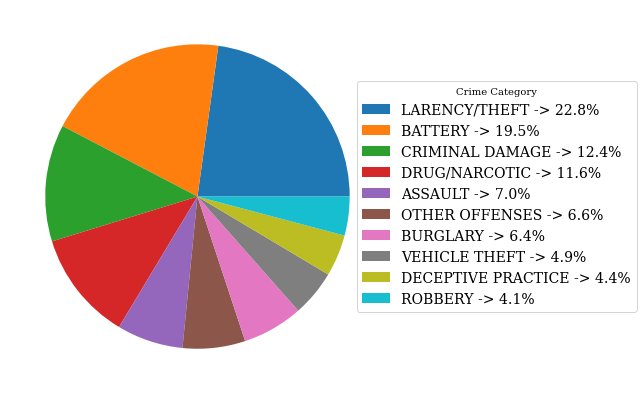

In [ ]:
# Plot Top 10 Crime Categories usin pie plot 

fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(aspect="equal"))

## Top 10 Crime data
count_data = Crime_category_descending.Count.head(10).values
cat_data = Crime_category_descending.Category.head(10).values

## To iterate through lambda function
i = itertools.count()


## get percentage
def get_percentage(data):
    sum_val = sum(data)
    percentage_val = []
    for i in range(len(data)):
      percentage_val.append(data[i]*100/sum_val)
    return percentage_val 


wedges, texts = ax.pie(count_data, textprops = dict(color = "w"))

labels = [f'{l} -> {s:1.1f}%' for l, s in zip(cat_data, get_percentage(count_data))]
ax.legend(wedges, labels,
          title="Crime Category",
          loc="center left",
          bbox_to_anchor=(.9, 0, 0, 1),
          prop = {'size': 14})
# plt.setp(autotexts, size=12, weight="bold")

# ax.set_title("Pie Plot for Top 10 Crimes", fontsize = 15)
plt.savefig(PATH_IMAGE +"Pie_Plot_for_Top_10_Crimes(2004-2017).png")
plt.show()


In [ ]:
# Data groupby month and year to get number of crimes per day
data_year_month_day_groupby = dataset_df.groupby(["Year","Month","DayofMonth"]).size().reset_index()
data_year_month_day_groupby.columns = ["Year","Month","DayofMonth","Count"]
data_year_month_day_groupby

,Year,Month,DayofMonth,Count
0,2004,1,1,1892
1,2004,1,2,1317
2,2004,1,3,1183
3,2004,1,4,880
4,2004,1,5,941
...,...,...,...,...
5109,2017,12,27,523
5110,2017,12,28,601
5111,2017,12,29,574
5112,2017,12,30,621


In [ ]:
YMD = [datetime.datetime(data_year_month_day_groupby["Year"].values[i], data_year_month_day_groupby["Month"].values[i], data_year_month_day_groupby["DayofMonth"].values[i]) for i in range(len(data_year_month_day_groupby))]
for i in range(len(YMD)): 
  YMD[i] = YMD[i].strftime("%Y-%m-%d")

Crime_count_ymd = { 'Date': YMD,
                   'Number of Crimes': data_year_month_day_groupby["Count"].values
                   }
crime_count_ymd_df = pd.DataFrame(Crime_count_ymd, columns=["Date","Number of Crimes"]).set_index("Date")
crime_count_ymd_df

,Number of Crimes
Date,
2004-01-01,1892
2004-01-02,1317
2004-01-03,1183
2004-01-04,880
2004-01-05,941
...,...
2017-12-27,523
2017-12-28,601
2017-12-29,574


In [ ]:
# Data groupby month and year to get number of crimes per month
data_month_year_groupby = dataset_df.groupby(["Month","Year"]).size().reset_index()
data_month_year_groupby.columns = ['Month','Year','Count']
data_month_year_groupby

,Month,Year,Count
0,1,2004,35107
1,1,2005,33863
2,1,2006,36757
3,1,2007,34105
4,1,2008,33372
...,...,...,...
163,12,2013,21858
164,12,2014,20978
165,12,2015,21135
166,12,2016,20371


In [ ]:
# Initialize a list with Minimum number of crimes per month using 13 years data (2003 - 2015)
Month_min = [data_month_year_groupby.Count[i:(i+num_year)].min() for i in range(0,len(data_month_year_groupby),num_year)]

# Initialize a list with Maximum number of crimes per month using 13 years data (2003 - 2015)
Month_max = [data_month_year_groupby.Count[i:(i+num_year)].max() for i in range(0,len(data_month_year_groupby),num_year)]

#  Make a array of data showing min and max number of crime of the months using 12 years data 
Month_min_max = { 'Month': [1,2,3,4,5,6,7,8,9,10,11,12],
                 'Month_min': Month_min,
                 'Month_max': Month_max
}

# Make a dataframe with the information of the array
Month_min_max_df = pd.DataFrame(Month_min_max, columns=["Month","Month_min","Month_max"])

print("Minimum cases per month in 14 years: ",Month_min)
print("Maximum cases per month in 14 years: ",Month_max)
print(Month_min_max_df)

Minimum cases per month in 14 years:  [20027, 16381, 20545, 21147, 23365, 23172, 24214, 24720, 22826, 22899, 20574, 20371]
Maximum cases per month in 14 years:  [36757, 34066, 39855, 38871, 40781, 41133, 43239, 43044, 41213, 41523, 36841, 34323]
    Month  Month_min  Month_max
0       1      20027      36757
1       2      16381      34066
2       3      20545      39855
3       4      21147      38871
4       5      23365      40781
5       6      23172      41133
6       7      24214      43239
7       8      24720      43044
8       9      22826      41213
9      10      22899      41523
10     11      20574      36841
11     12      20371      34323


In [ ]:
# Number of crime per month of 14 years (row indicating month and column indicating the years)
per_month_crime= [data_month_year_groupby.Count.values[i:(i+num_year)] for i in range(0,len(data_month_year_groupby),num_year)]
per_month_crime

[array([35107, 33863, 36757, 34105, 33372, 30256, 29231, 27209, 26295,
        25494, 20027, 20914, 20695, 22095]),
 array([34066, 31988, 31299, 27136, 29049, 28235, 24947, 22235, 23877,
        21402, 18026, 16381, 18727, 19285]),
 array([39855, 36905, 36984, 36352, 33978, 33689, 32337, 28698, 28567,
        24969, 22189, 21665, 22032, 20545]),
 array([38269, 38871, 36476, 35634, 35593, 32569, 31674, 29105, 27184,
        25528, 22917, 21712, 21147, 21674]),
 array([40781, 40468, 39616, 40088, 38064, 35246, 33407, 31589, 30103,
        27997, 24861, 23690, 23523, 23365]),
 array([41133, 40052, 38814, 38996, 37698, 34274, 32719, 32314, 31085,
        27379, 25441, 23172, 24052, 23841]),
 array([43239, 41807, 41550, 40990, 40490, 35676, 33512, 33256, 31982,
        28630, 26558, 24214, 24840, 24846]),
 array([43044, 41544, 40498, 39849, 40536, 35829, 34155, 32590, 30046,
        28654, 25880, 24800, 24896, 24720]),
 array([41213, 39625, 37773, 38265, 37440, 33870, 31890, 29939, 27760,
 

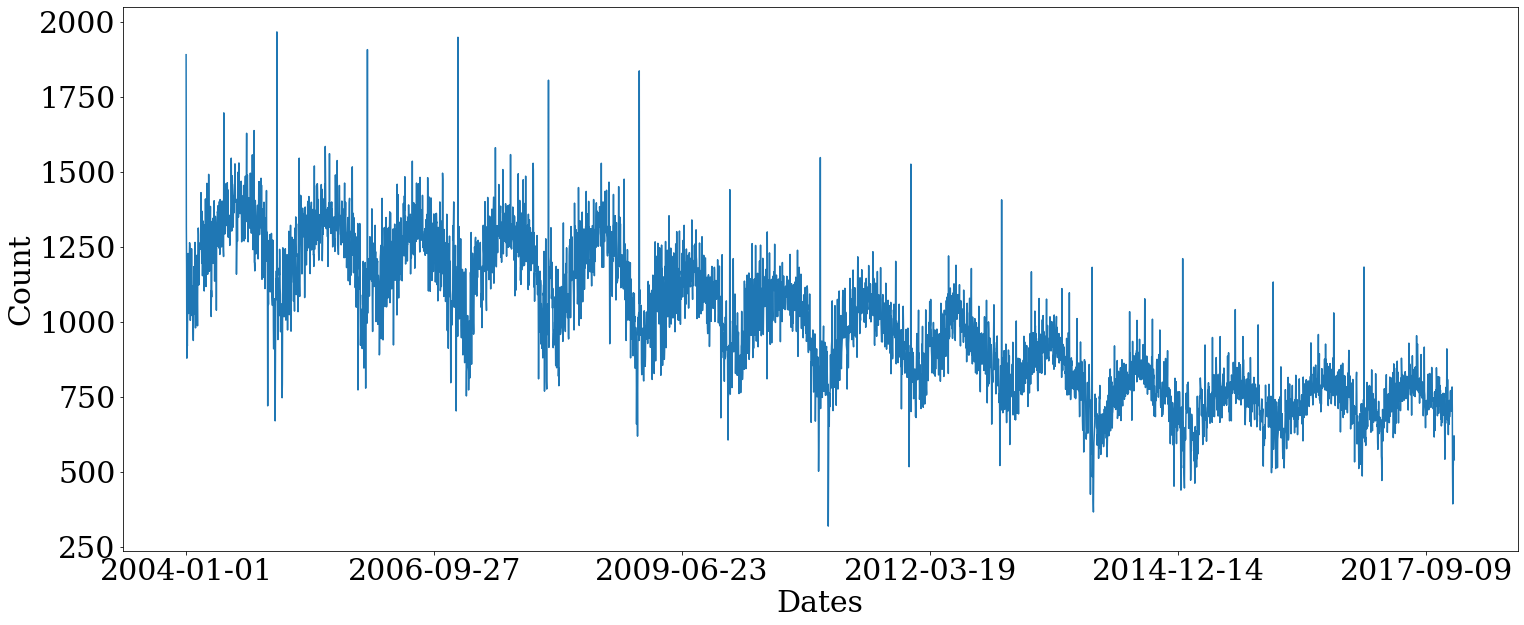

In [ ]:
# Plot per day crime data
plt.figure(figsize=(25,10))
crime_count_ymd_df["Number of Crimes"].plot()
plt.tick_params(axis='both', labelsize = 30)
plt.xlabel('Dates',fontsize = 30)
plt.ylabel('Count',fontsize = 30)
plt.savefig(PATH_IMAGE+"Number_of_crimes_per_day(2004-2017).png")
plt.show()

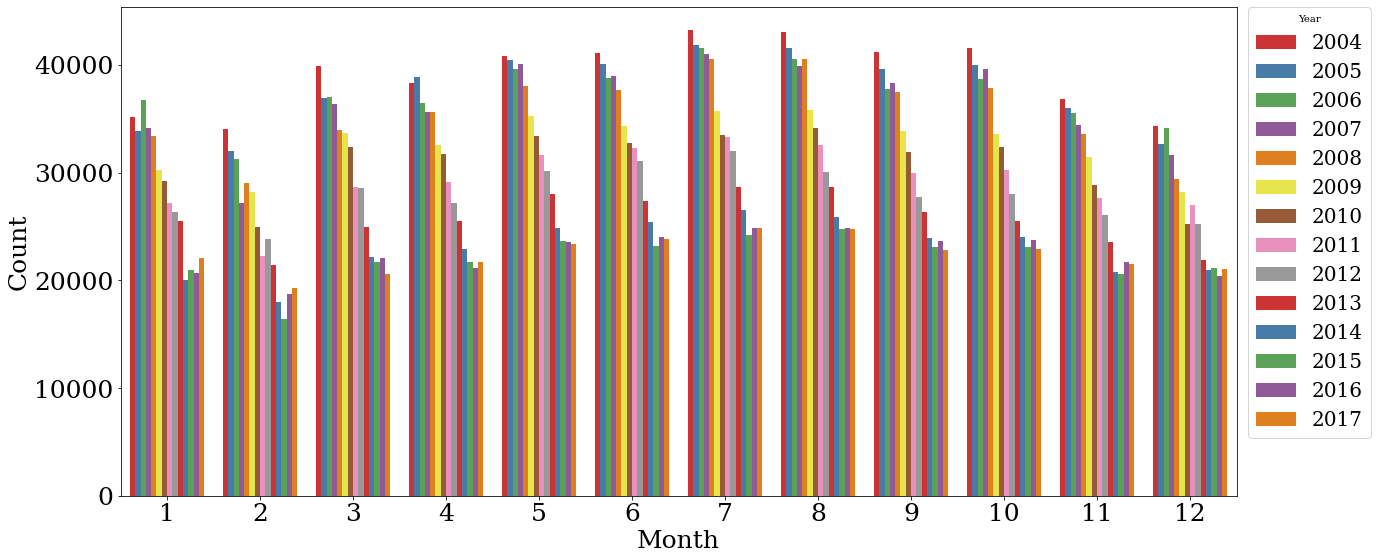

In [ ]:
# Plot number of crimes per month in per year using countplot of seaborn library
plt.figure(figsize=(20,9))
cplot_month = sns.countplot(x="Month", hue = "Year",data=dataset_df, palette="Set1" )
plt.tick_params(axis='both', labelsize = 25)
plt.xlabel('Month',fontsize = 25)
plt.ylabel('Count',fontsize = 25)
plt.legend(title= "Year",bbox_to_anchor=(1.01, 1),borderaxespad=0, prop = {'size': 20})
#cplot_month.set_title("Number of crimes in each month(2004 to 2017)")
plt.savefig(PATH_IMAGE+"Number_of_crimes_in_each_month(2004-2017).png")

In [ ]:
# Color palette choose
color =sns.color_palette("Set1")
color

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6, 0.6, 0.6)]

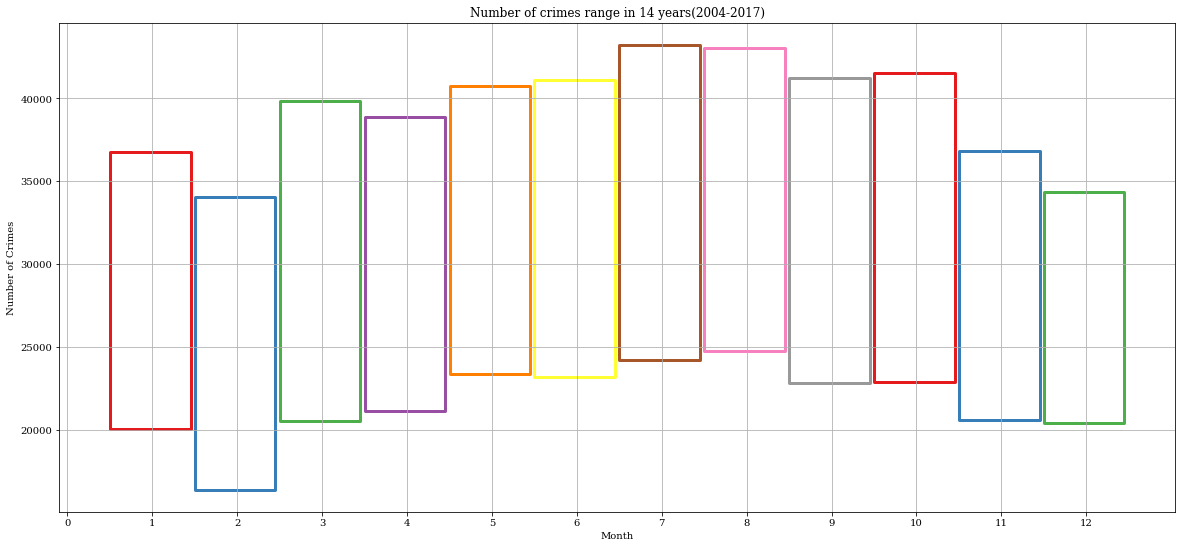

In [ ]:
# Ploting range of number of crimes per month per year 
fig, ax = plt.subplots(figsize=(20,9))

for i in range(12):
  ax.broken_barh([(i+.5,.95)], (Month_min_max_df.Month_min[i], Month_min_max_df.Month_max[i]-Month_min_max_df.Month_min[i]), facecolor=(0, 0, 0, 0), linewidth=3, edgecolor = color[i%9])


ax.set_ylabel('Number of Crimes')
ax.set_xlabel('Month')

val =range(13)
ax.set_xticks(val)

ax.grid(True)
ax.set_title("Number of crimes range in 14 years(2004-2017)")
plt.savefig(PATH_IMAGE+"Number_of_crimes_range_in_14_years(2004-2017).png")
plt.show()

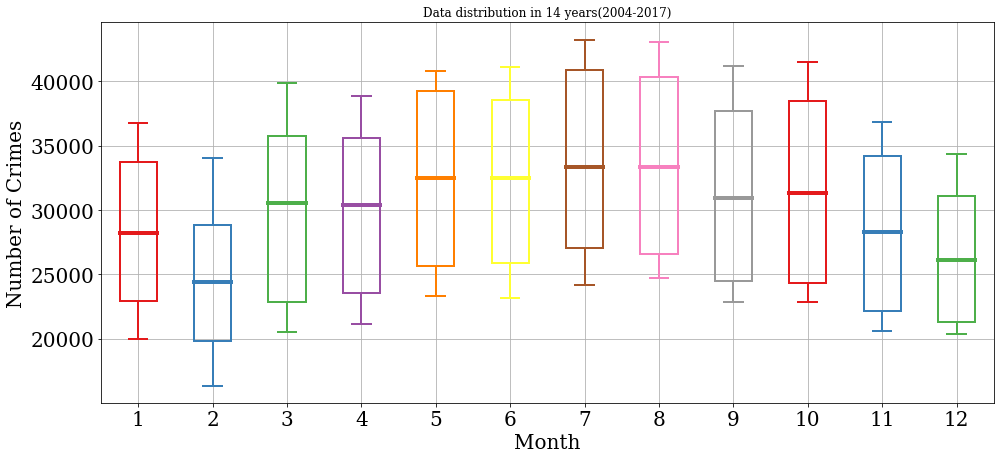

In [ ]:
# Ploting the per_month_crime data to show the distribution
fig, ax = plt.subplots(figsize=(16,7))
bplots = ax.boxplot(per_month_crime, patch_artist = True)

i = 0
for box in bplots["boxes"]:
  plt.setp(box, edgecolor = color[i%9],facecolor = ([0,0,0,0]), linewidth = 2)
  i+=1

i = 0
for fl in bplots["fliers"]:
  plt.setp(fl, markerfacecolor = color[i%9], markeredgecolor = color[i%9], marker = 'o')
  i+=1

i = 0
for med in bplots["medians"]:
  plt.setp(med, color = color[i%9],linewidth = 4)
  i+=1

i = 0
j = 0
for cp in bplots["caps"]:
  plt.setp(cp, color = color[i%9],linewidth = 2)
  j += 1
  if(j%2==0):
    i+=1
    
i = 0
j =0
for wh in bplots["whiskers"]:
  plt.setp(wh, color = color[i%9],linewidth = 2)
  j += 1
  if(j%2==0):
    i+=1


ax.tick_params(axis='both', labelsize = 20)
ax.set_xlabel("Month",fontsize = 20)
ax.set_ylabel("Number of Crimes",fontsize = 20)
ax.grid(True)
ax.set_title("Data distribution in 14 years(2004-2017)")
plt.savefig(PATH_IMAGE+"Data_distribution_in_14_years(2004-2017).png")

plt.show()

In [ ]:
# Data groupby year to get number of crimes per day
data_pd_year_groupby = dataset_df.groupby(["Year","PdDID","PdDistrict"]).size().reset_index()
data_pd_year_groupby.columns = ["Year","PdDID","PdDistrict","Count"]
data_pd_year_groupby

,Year,PdDID,PdDistrict,Count
0,2004,0,1.0,17578
1,2004,1,20.0,8369
2,2004,2,9.0,23699
3,2004,3,6.0,26106
4,2004,4,3.0,24278
...,...,...,...,...
318,2017,18,2.0,11621
319,2017,19,18.0,15097
320,2017,20,12.0,13508
321,2017,21,22.0,8363


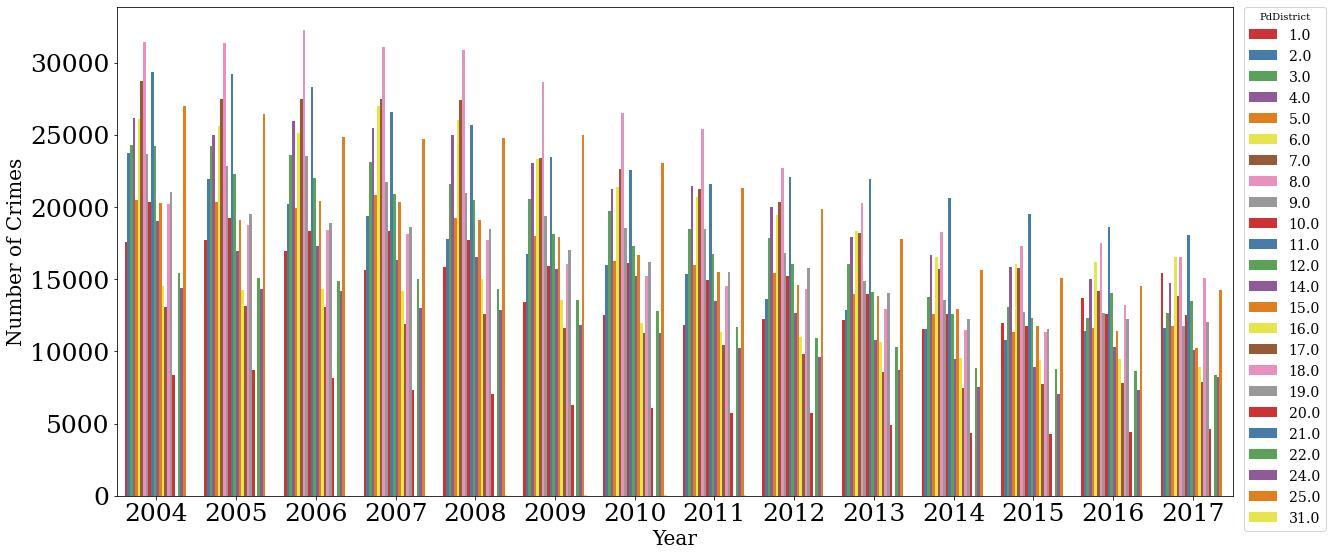

In [ ]:
# Plot number of crimes per year using countplot of seaborn library
plt.figure(figsize=(20,9))
cplot_month = sns.countplot(x="Year", hue = "PdDistrict",data=dataset_df, palette="Set1" )
#cplot_month.set_title("Yearly Number of crimes for each Police department (2004 to 2017)")
plt.tick_params(axis='both', labelsize = 25)
plt.xlabel("Year",fontsize = 20)
plt.ylabel("Number of Crimes",fontsize = 20)
plt.legend(title= "PdDistrict", bbox_to_anchor=(1.01, 1),
           borderaxespad=0, prop = {'size': 14})
plt.savefig(PATH_IMAGE+"Yearly_number_of_crimes_in_each_Police_department(2004-2017).png")

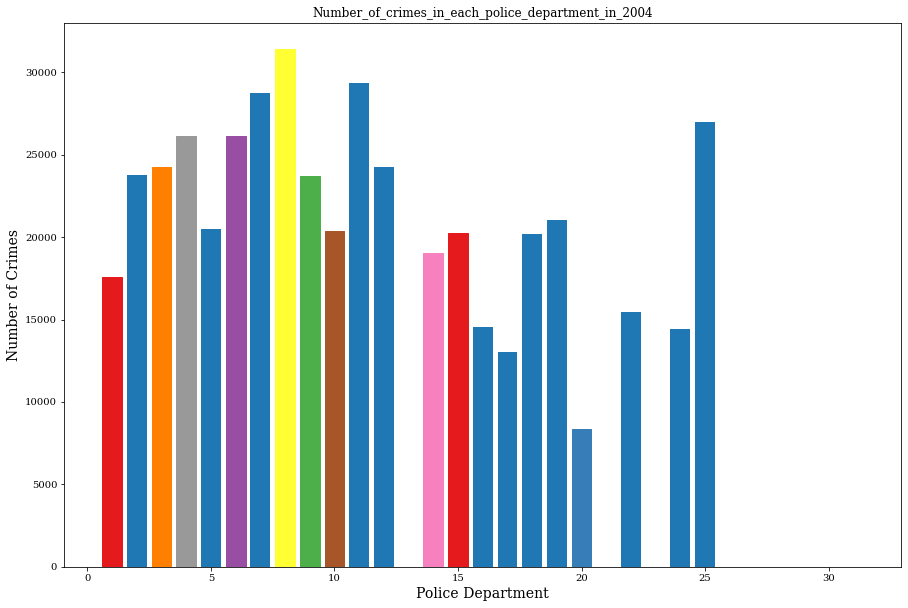

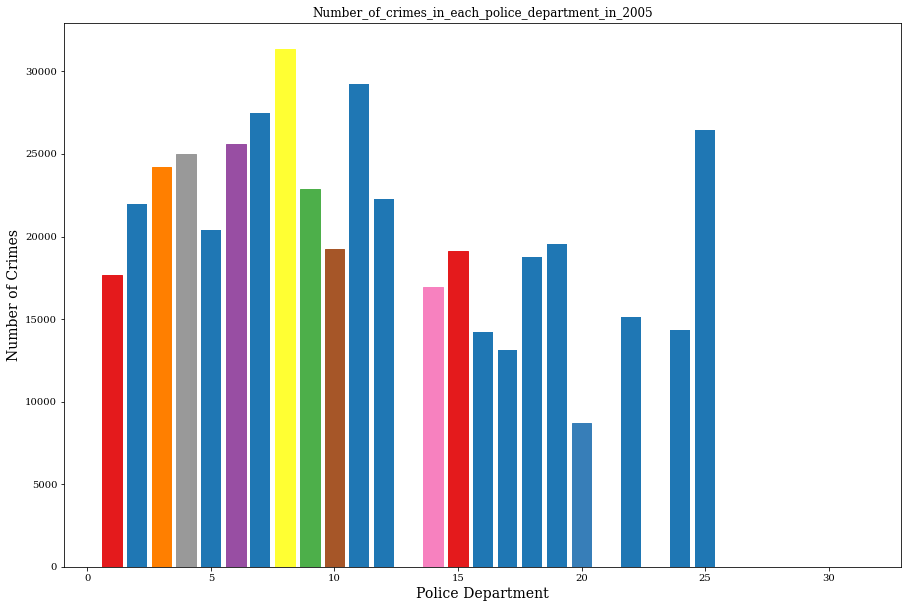

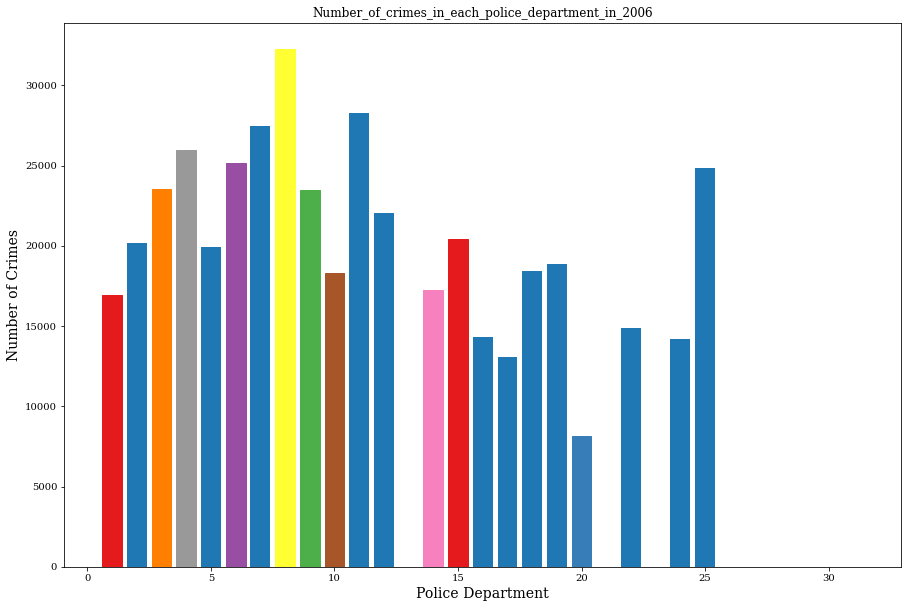

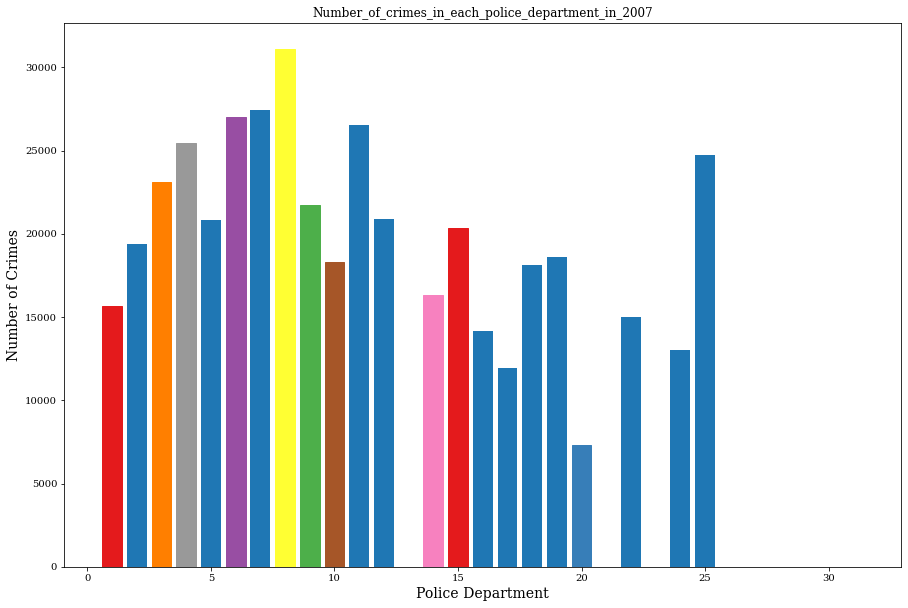

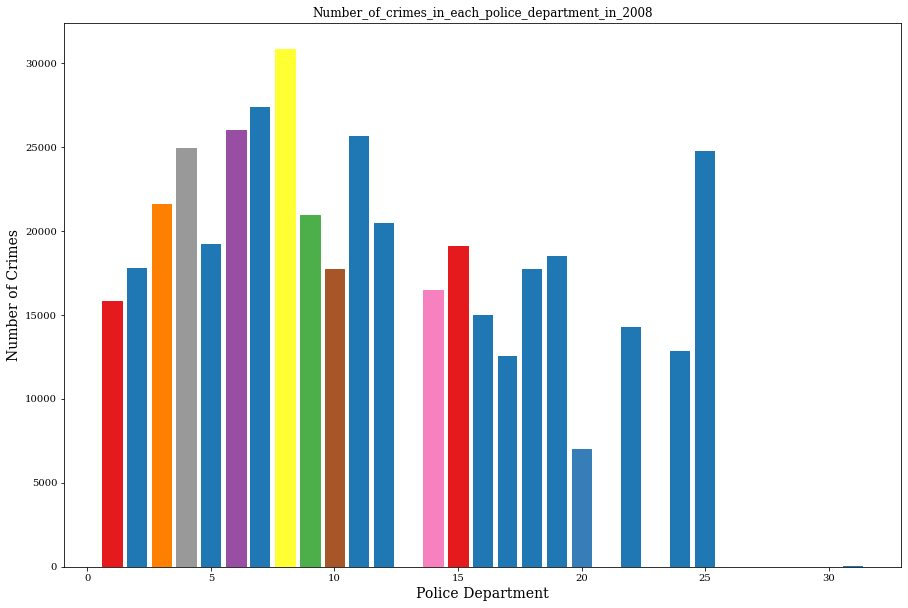

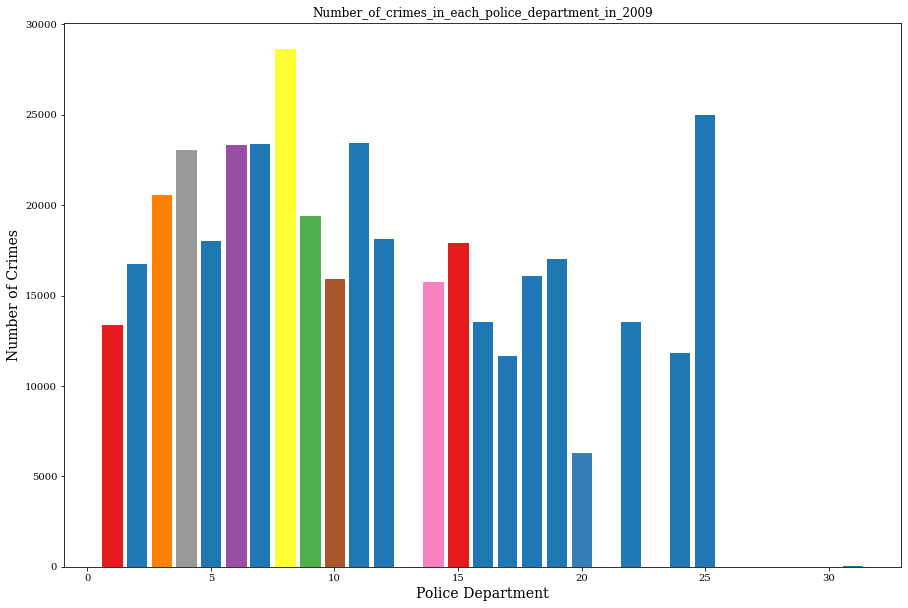

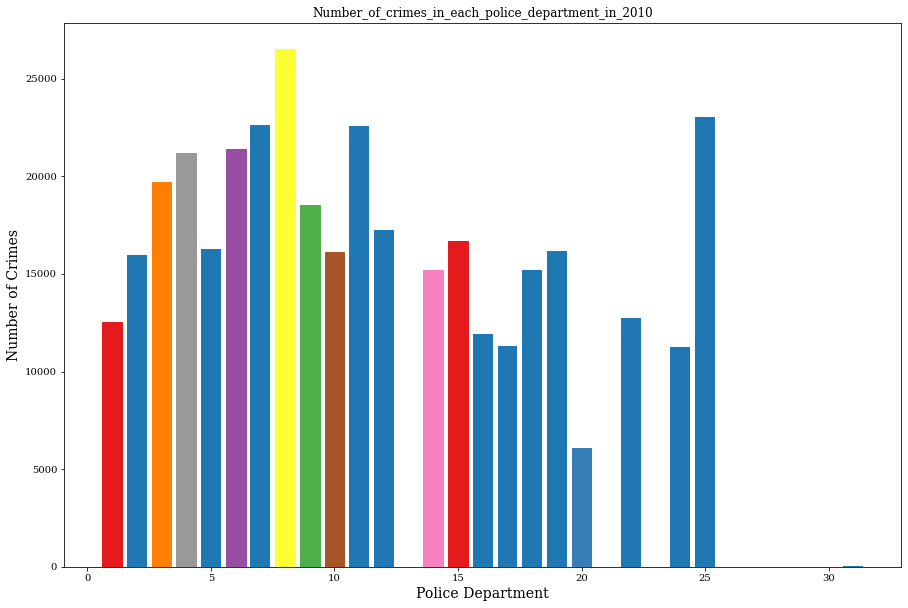

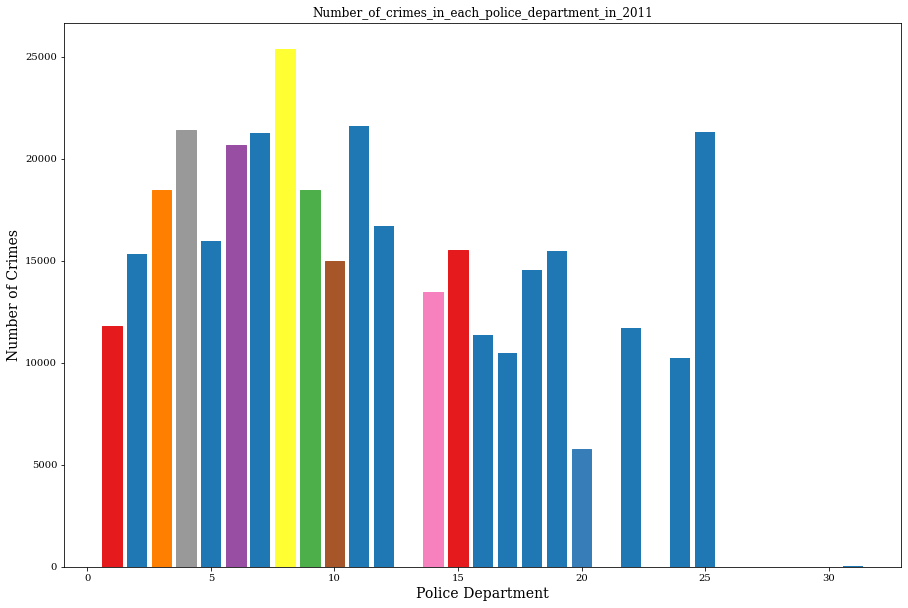

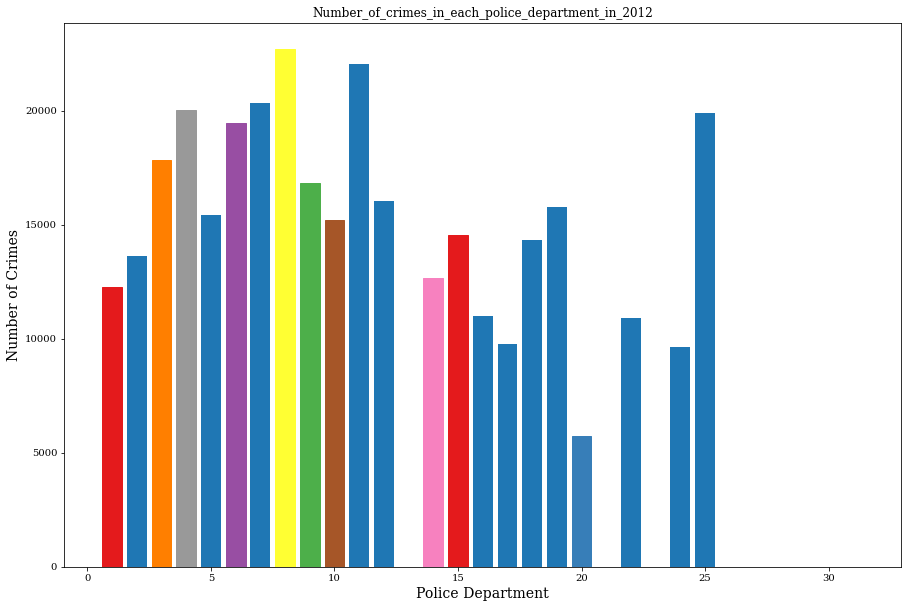

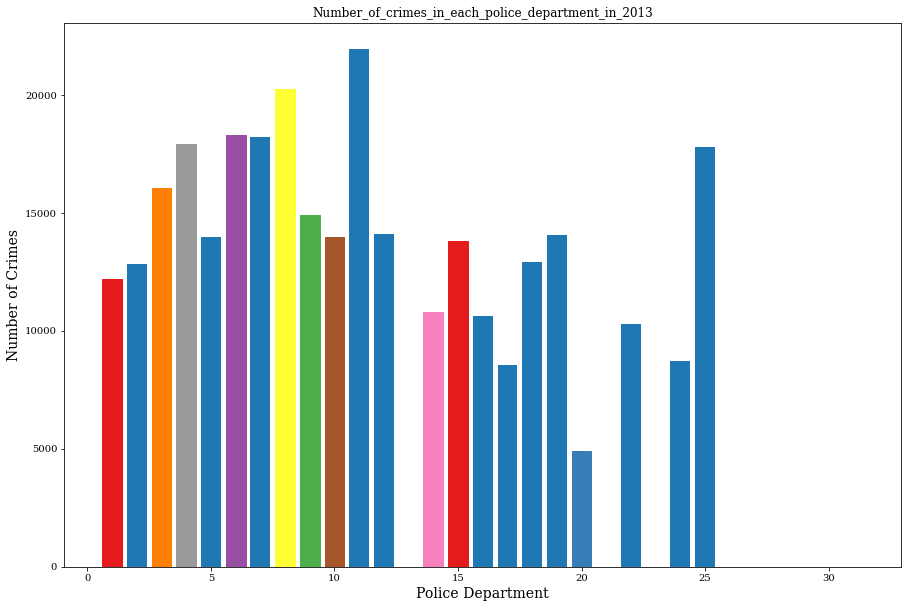

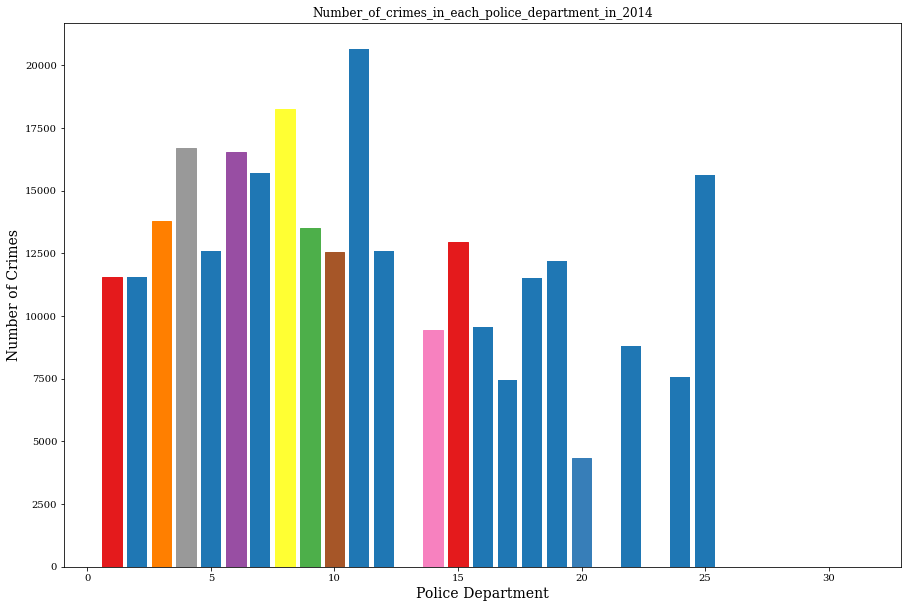

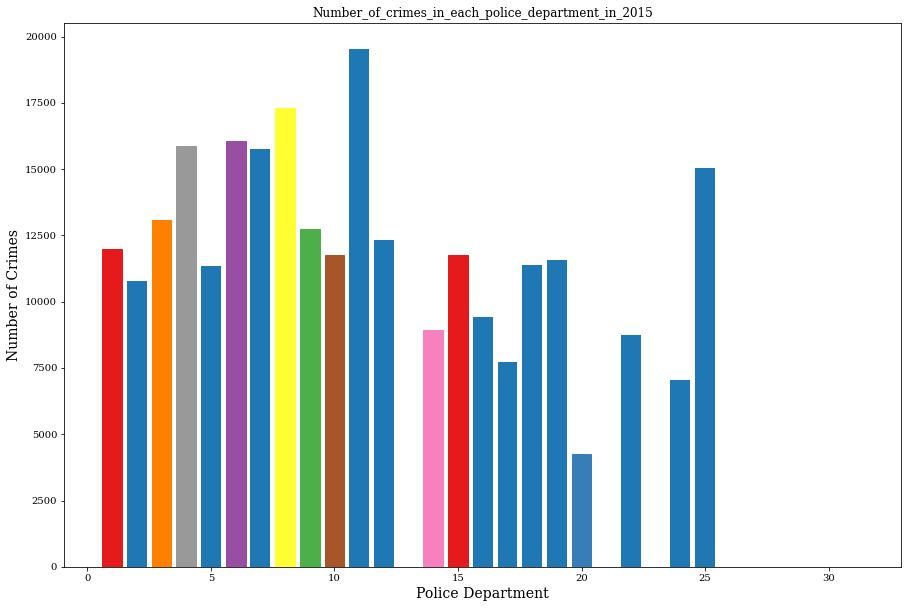

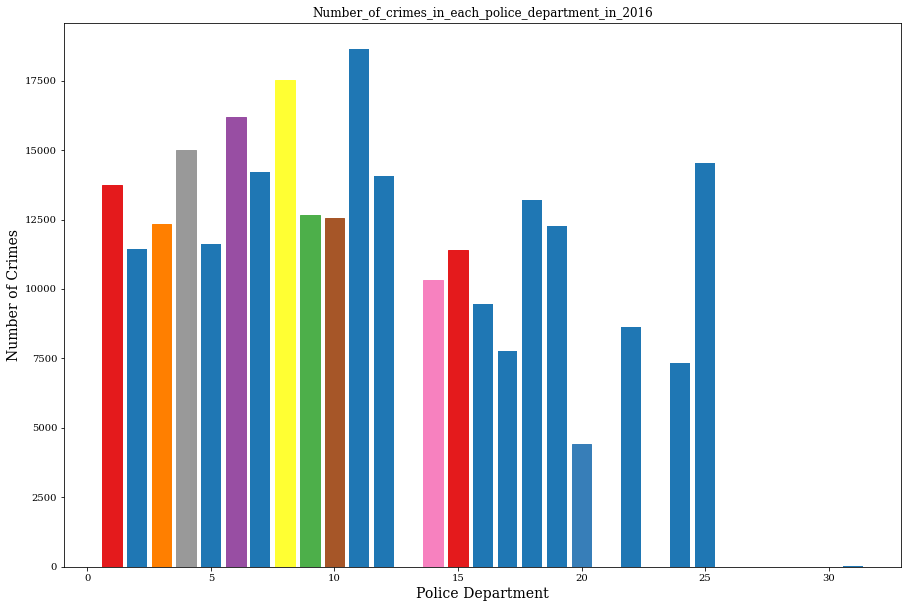

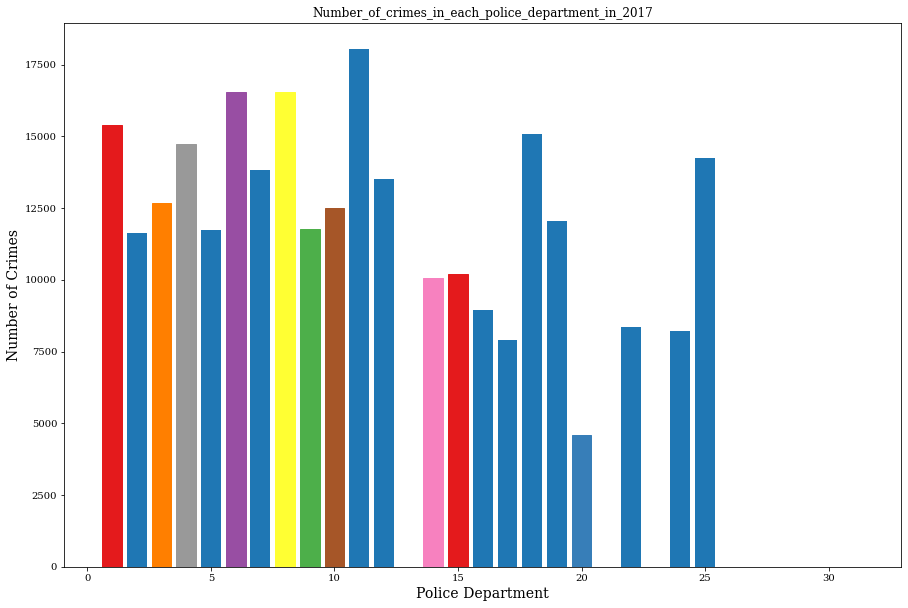

In [ ]:
# Plot per police district crime data
for y in range(2004,2018):
  plt.figure(figsize=(15,10))
  barplot = plt.bar(data_pd_year_groupby[data_pd_year_groupby.Year == y]["PdDistrict"], data_pd_year_groupby[data_pd_year_groupby.Year == y]["Count"])
  for i in range(10):
    cl = color[i%9]
    barplot[i].set_color(cl)
  plt.xlabel("Police Department", {"size":"14"})
  plt.ylabel("Number of Crimes", {"size":"14"})
  plt.title("Number_of_crimes_in_each_police_department_in_%i" %y)
  plt.savefig(PATH_IMAGE+"Number_of_crimes_in_each_police_department_in_%i.png" %y)
plt.show()

In [ ]:
# Data groupby year, month to get number of crimes per day
data_pd_year_month_groupby = dataset_df.groupby(["Year","Month","PdDID","PdDistrict"]).size().reset_index()
data_pd_year_month_groupby.columns = ["Year","Month","PdDID","PdDistrict","Count"]
data_pd_year_month_groupby

,Year,Month,PdDID,PdDistrict,Count
0,2004,1,0,1.0,1328
1,2004,1,1,20.0,603
2,2004,1,2,9.0,1847
3,2004,1,3,6.0,2009
4,2004,1,4,3.0,1798
...,...,...,...,...,...
3785,2017,12,17,19.0,938
3786,2017,12,18,2.0,949
3787,2017,12,19,18.0,1364
3788,2017,12,20,12.0,1107


In [ ]:
data_pd_year_month_groupby.Count.min()

1

In [ ]:
data_pd_year_month_groupby.Count.max()

2930

In [ ]:
for p in range(10):
  for y in range(2004,2018):
    plt.figure(figsize=(15,15))
    barplot = plt.bar(data_pd_year_month_groupby[(data_pd_year_month_groupby.Year == y) & (data_pd_year_month_groupby.PdDID == p)]["Month"], data_pd_year_month_groupby[(data_pd_year_month_groupby.Year == y) & (data_pd_year_month_groupby.PdDID == p)]["Count"])
    for i in range(10):
      cl = color[i%9]
      barplot[i].set_color(cl)
    y_min = data_pd_year_month_groupby[(data_pd_year_month_groupby.Year == y) & (data_pd_year_month_groupby.PdDID == p)]["Count"].min()
    y_max = data_pd_year_month_groupby[(data_pd_year_month_groupby.Year == y) & (data_pd_year_month_groupby.PdDID == p)]["Count"].max()  
    plt.ylim(y_min-20,y_max+20)
    plt.xlabel("Month", {"size":"14"})
    plt.ylabel("Number of Crimes", {"size":"14"})
    plt.title("Number_of_crimes_in_"+str(Police_dept_id_name[p])+"_police_department_in_%i" %y)
    plt.savefig(PATH_IMAGE+"Number_of_crimes_in_"+str(Police_dept_id_name[p])+"_police_department_in_%i.png" %y)
plt.show()

In [ ]:
for m in range(1,13):
  for y in range(2004,2018):
    plt.figure(figsize=(15,15))
    barplot = plt.bar(data_pd_year_month_groupby[(data_pd_year_month_groupby.Year == y) & (data_pd_year_month_groupby.Month == m)]["PdDistrict"], data_pd_year_month_groupby[(data_pd_year_month_groupby.Year == y) & (data_pd_year_month_groupby.Month == m)]["Count"])
    for i in range(10):
      cl = color[i%9]
      barplot[i].set_color(cl)
    mn = m
    datetime_object = datetime.datetime.strptime(str(mn), "%m")
    month_name = datetime_object.strftime("%B")
    y_min = data_pd_year_month_groupby[(data_pd_year_month_groupby.Year == y) & (data_pd_year_month_groupby.Month == m)]["Count"].min()
    y_max = data_pd_year_month_groupby[(data_pd_year_month_groupby.Year == y) & (data_pd_year_month_groupby.Month == m)]["Count"].max()
    plt.ylim(y_min-20,y_max+20)
    plt.xlabel("Police Department", {"size":"14"})
    plt.ylabel("Number of Crimes", {"size":"14"})
    plt.title("Number_of_crimes_in_"+month_name+"_Month_in_%i" %y)
    plt.savefig(PATH_IMAGE+"Number_of_crimes_in_"+month_name+"_police_department_in_%i.png" %y)
plt.show()

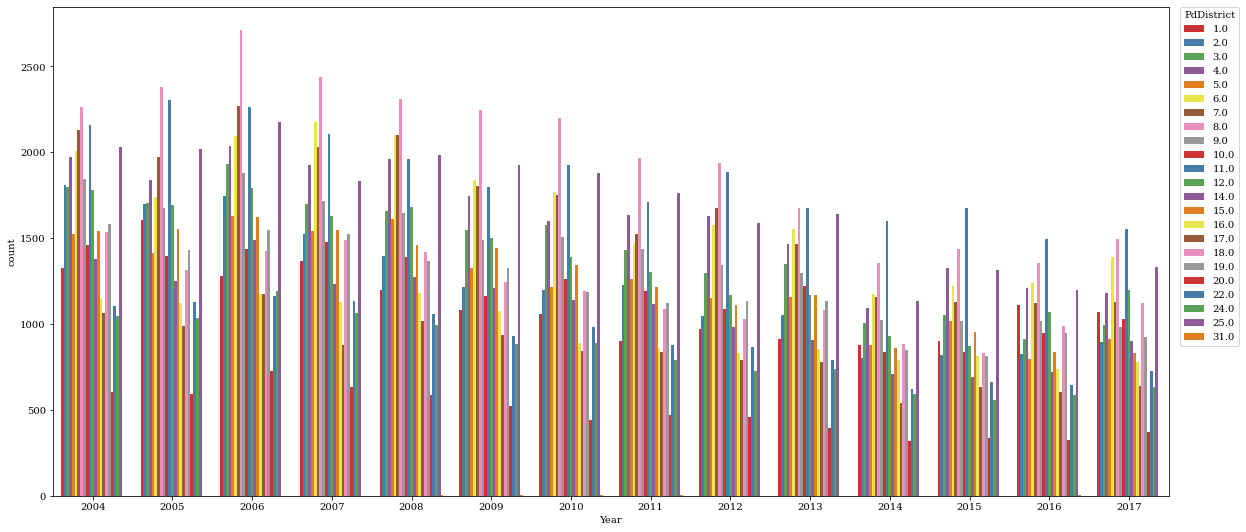

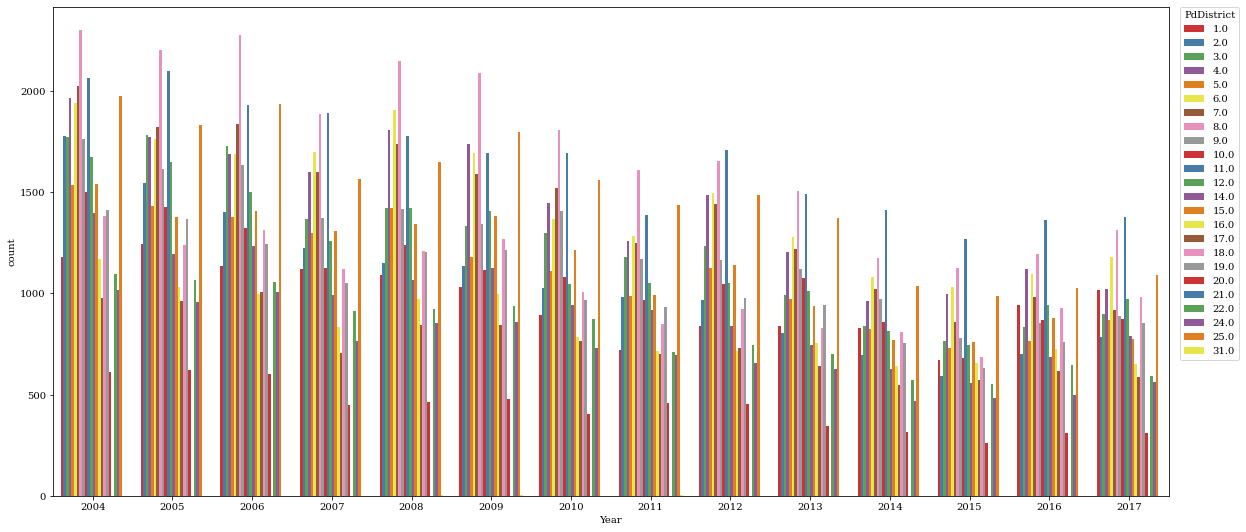

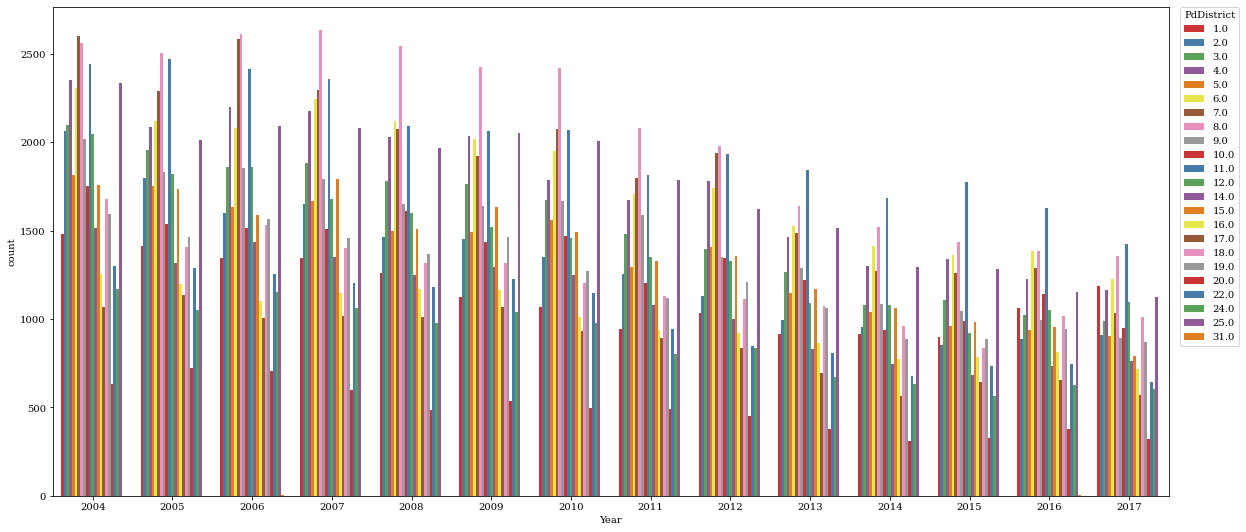

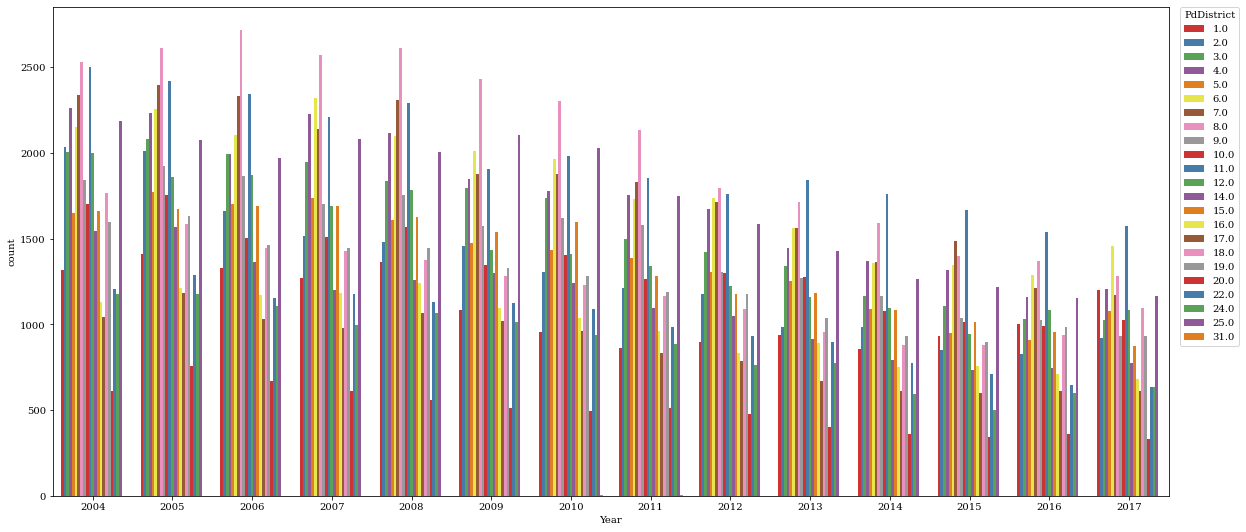

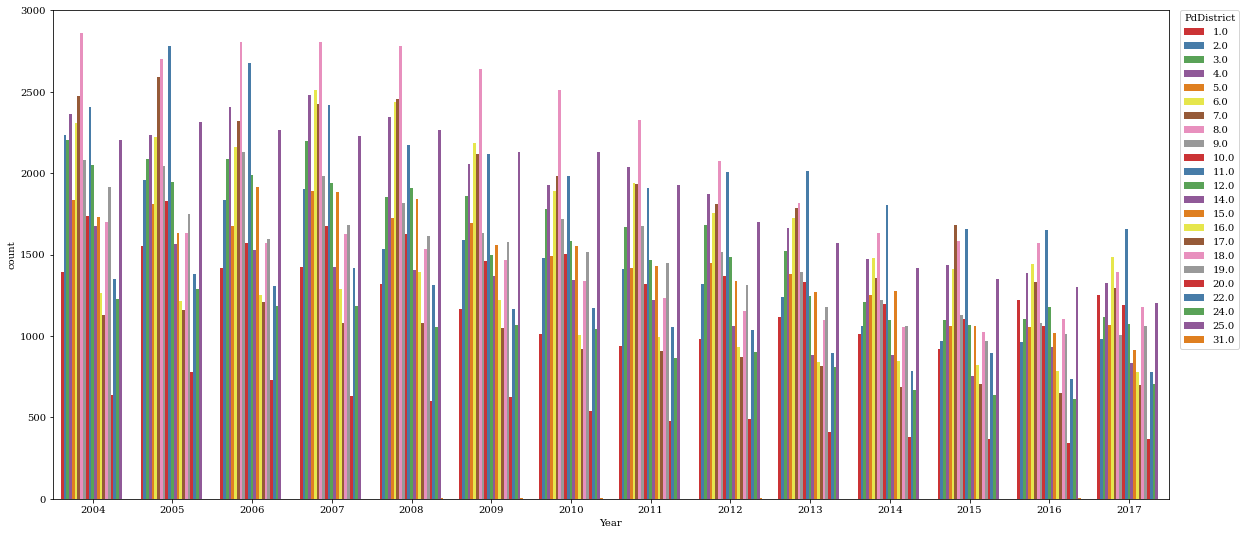

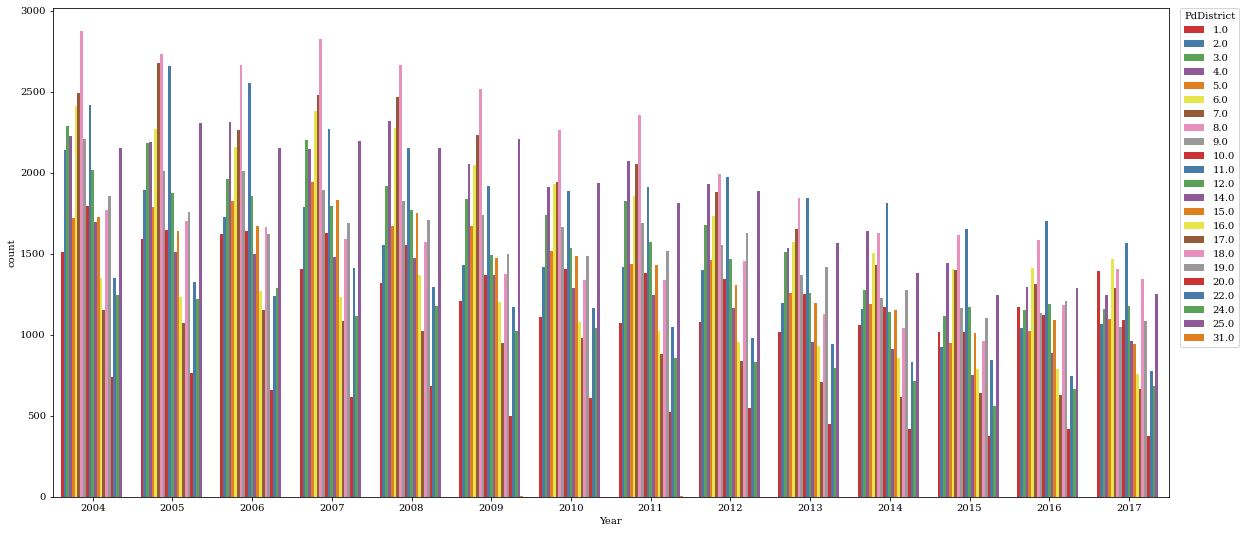

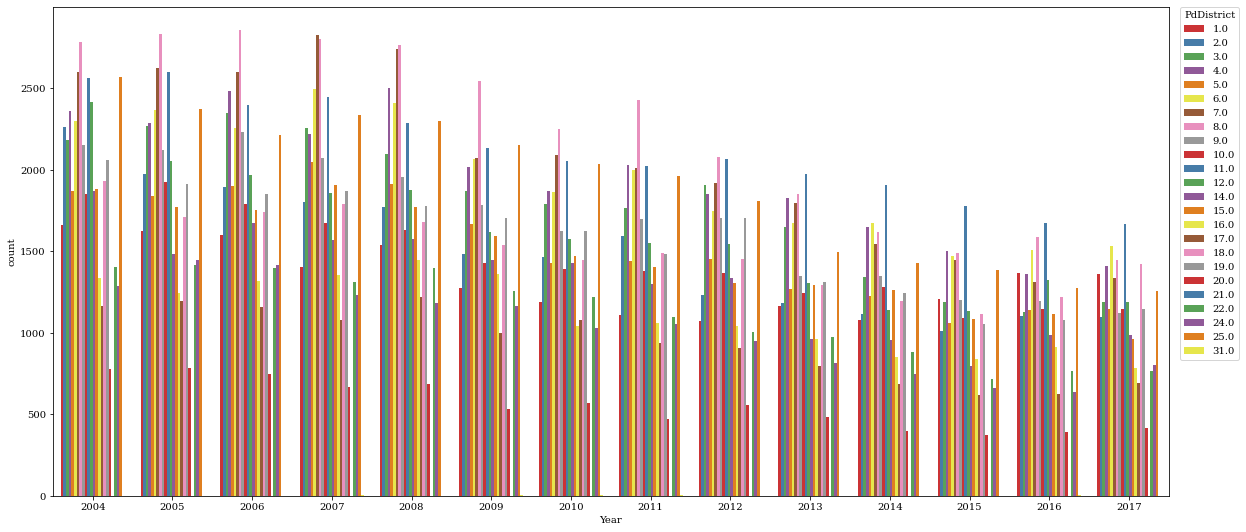

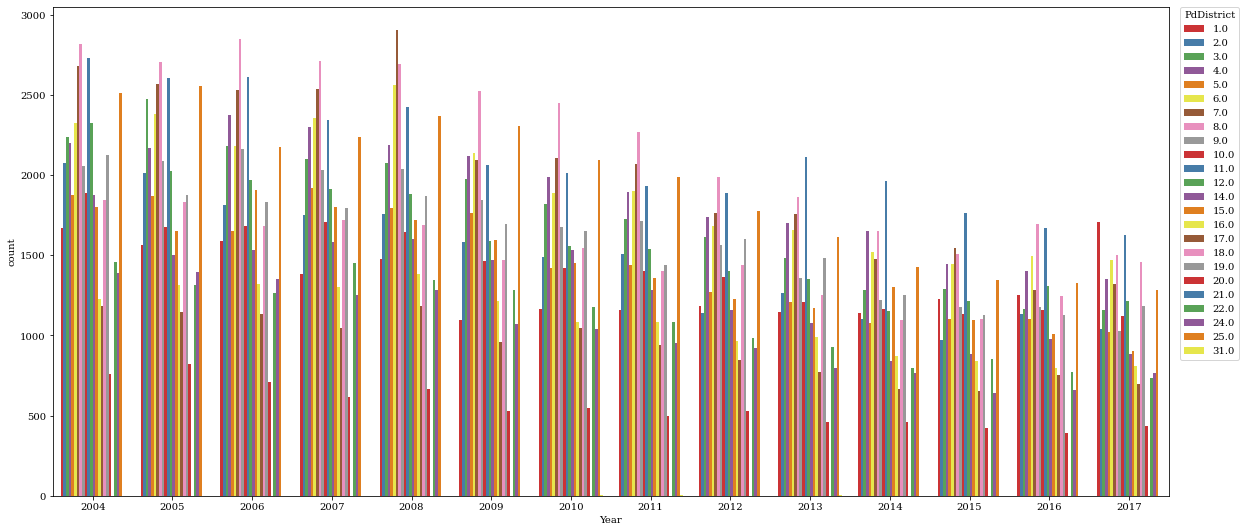

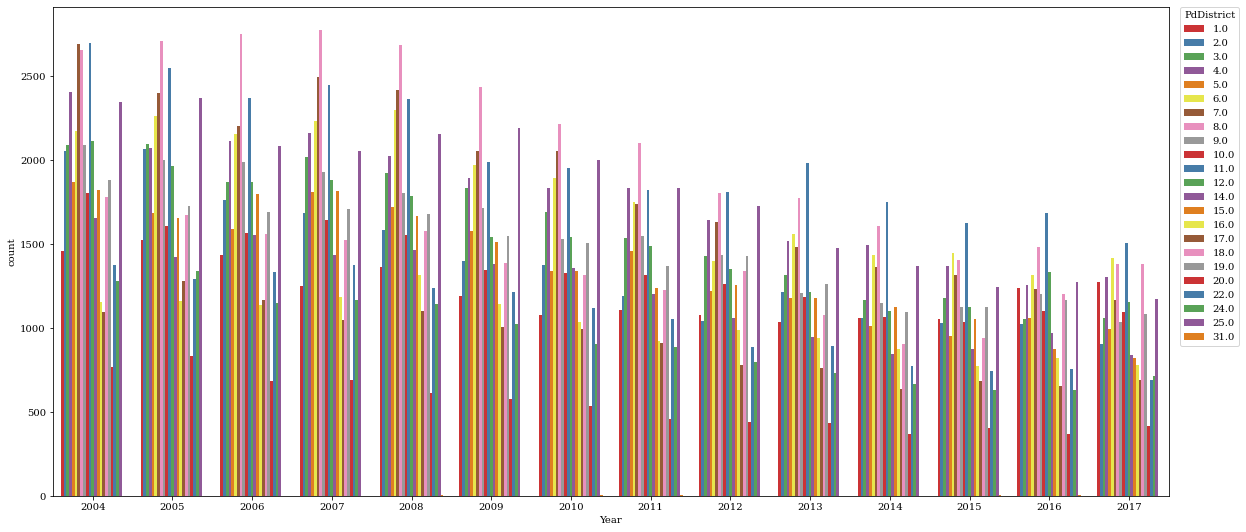

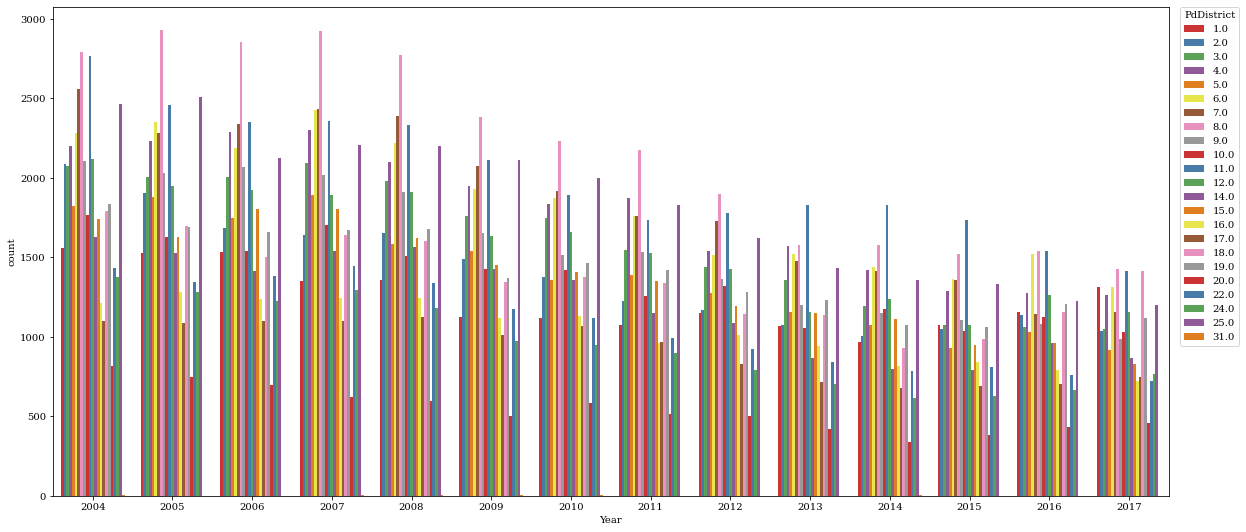

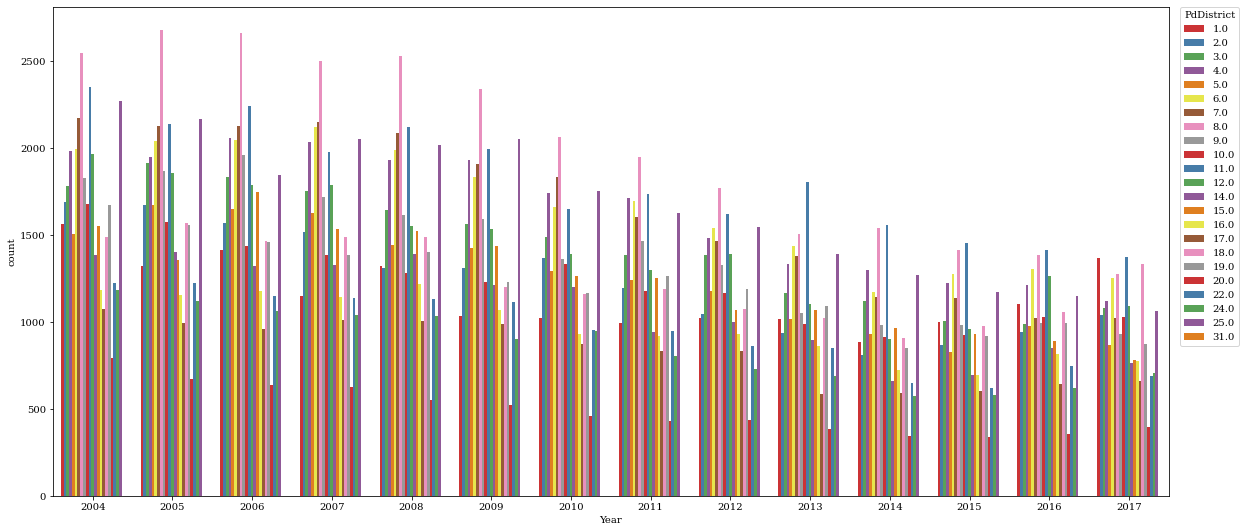

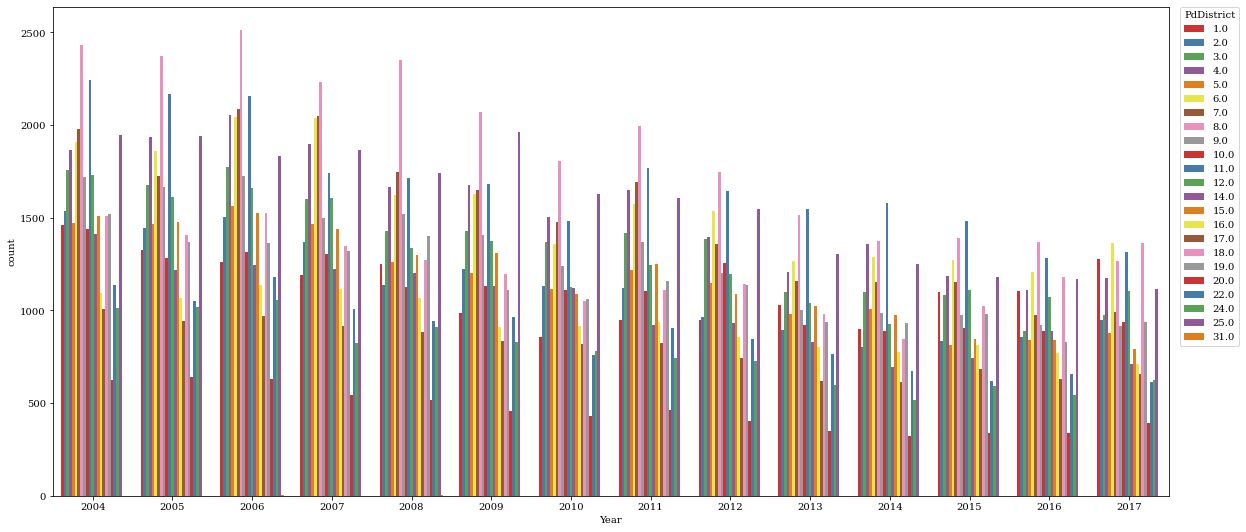

In [ ]:
for m in range(1,13):
  data_per_month = dataset_df[(dataset_df.Month == m)]
  plt.figure(figsize=(20,9))
  cplot_per_month = sns.countplot(x="Year", hue = "PdDistrict",data=data_per_month, palette="Set1" )
  plt.legend(title = "PdDistrict",bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
  mn = m
  datetime_object = datetime.datetime.strptime(str(mn), "%m")
  month_name = datetime_object.strftime("%B")

  plt.savefig(PATH_IMAGE+"/Number_of_crimes_in_"+month_name+"_Chicago.png")
plt.show()

**End **